# Problem: K-Means Algorithm

In this problem, we shall apply K-Means Algorithm to a popular visual classification dataset CIFAR-10. CIFAR-10 dataset consists of 60K labeled 32 x 32 colored images i.e., each image would have 3 channels corresponding to RGB colors. Out of the total 60K images, 50K images belong to the training set and 10K belong to the testing set. Within the scope of this problem, we shall work with the testing set only for computational efficiency purposes. Additionally, as K-Means is an unsupervised learning algorithm, we shall discard the labels associated with the images.

Dataset:
* **CIFAR-10 Dataset**: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

In [ ]:
## Function to load the CIFAR10 data
## Documentation of CIFAR10: https://www.cs.toronto.edu/~kriz/cifar.html
def dataloader():
  import tensorflow as tf
  cifar10 = tf.keras.datasets.cifar10
  (_, _), (X, y) = cifar10.load_data()
  return X, y

In [ ]:
## simple utility function to visualize the data
def visualize(X, ind):
  from PIL import Image 
  plt.imshow(Image.fromarray(X[ind], 'RGB'))

In [ ]:
X, y = dataloader()

In [ ]:
# 10K images of size 32 x 32 x 3 
# where 32 x 32 is the height and width of the image
# 3 is the number of channels 'RGB'
X.shape, y.shape

((10000, 32, 32, 3), (10000, 1))

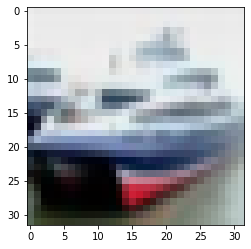

In [ ]:
visualize(X, 1)

In [ ]:
'''
  Implement this function to form a 10000 x N matrix 
  from 10000 x 32 x 32 x 3 shape input.
'''
def reshape(X):
  '''
    Write one line of code here
  '''
  X = X.reshape(10000, 3072)

  return X

In [ ]:
X = reshape(X)

In [ ]:
clustering_score = []
for i in tqdm(range(5, 20, 5)):
  score = 0
  for rs in tqdm(range(3)):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = rs)
    '''
      Write one line of code to fit the kMeans algorithm to the data
      Write another line of code to report the kMeans clustering score defined as
      Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
      Hint: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    '''
    kmeans.fit(X)
    score += kmeans.score(X)

  clustering_score.append(score/3) ## divide by 3 because 3 random states

100%|██████████| 3/3 [05:54<00:00, 118.32s/it]


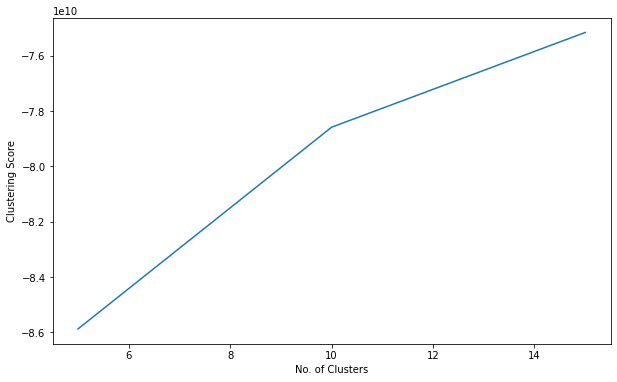

In [ ]:
'''
  Submit the plot you get after running this piece of code in your solutions
'''
plt.figure(figsize=(10,6))
plt.plot(range(5, 20, 5), clustering_score)
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

### Visualize K Clusters for K = 10 and random_state = 42


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2) 
#Transform the data
df = pca.fit_transform(X)

[[ -942.07347952   222.28616498]
 [ 2470.64434414 -2470.94465847]
 [ 1127.98556199 -2266.20891036]
 ...
 [-3932.30280799   646.30724963]
 [-1557.42431017   496.59140477]
 [ -492.87137595  -472.69128688]]


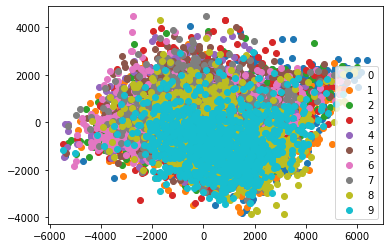

In [ ]:
### Analyzing the input data in 2D based on its true labels

u_labels = np.unique(y[:, 0])

for i in u_labels:
    plt.scatter(df[y[:, 0] == i , 0] , df[y[:, 0] == i , 1] , label = i)
plt.legend()
plt.show()

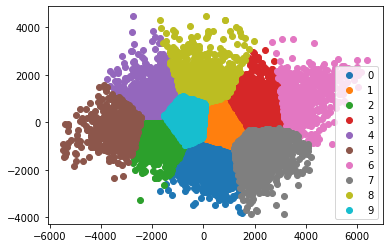

In [ ]:
'''
  Submit the output plot as a part of the solutions
'''

kmeans = KMeans(n_clusters = 10, init = 'random', random_state = 42)
'''
  Write one line of code to get the predicted labels of the 10-clusters
'''
label = kmeans.fit_predict(df)
u_labels = np.unique(label)
#plotting the results:
 
for i in u_labels:
    '''
      Write one line of code to get a scatter plot for i-th cluster.
      Have its label = i
    '''
    plt.scatter(df[label[:] == i , 0] , df[label[:] == i , 1] , label = i)

plt.legend()
plt.show()

# Problem: Backprop in a Neural Network 

In this exercise, we will walk through the forward and backward propagation process for a two-layer fully connected neural network. We will use the same data as in Homework 1, the Fashion-MNIST dataset. The data you will be using is X_train.npy, y_train.npy, X_test.npy, y_test.npy under the FashionMNIST folder.

In [ ]:
## Load fashionMNIST. This is the same code with homework one.
## Part a: Load and visualize the data.
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')
X_train_and_val = np.load('/content/drive/My Drive/CS M146/HW1-code/data/binary_classification/X_train.npy')
y_train_and_val = np.load('/content/drive/My Drive/CS M146/HW1-code/data/binary_classification/y_train.npy')
X_test = np.load('/content/drive/My Drive/CS M146/HW1-code/data/binary_classification/X_test.npy')
y_test = np.load('/content/drive/My Drive/CS M146/HW1-code/data/binary_classification/y_test.npy')
X_train, X_val = X_train_and_val[:4500], X_train_and_val[4500:]
y_train, y_val = y_train_and_val[:4500], y_train_and_val[4500:]
y_train[y_train[:] == -1] = 0
y_val[y_val[:] == -1] = 0
y_test[y_test[:] == -1] = 0
y_train = y_train.squeeze(1)
y_val = y_val.squeeze(1)
y_test = y_test.squeeze(1)
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Val data shape: ', X_val.shape)
print('Val target shape: ', y_val.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train data shape:  (4500, 784)
Train target shape:  (4500,)
Val data shape:  (500, 784)
Val target shape:  (500,)
Test data shape:  (500, 784)
Test target shape:  (500,)


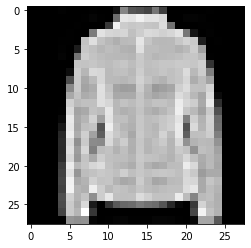

label is Shirt


In [ ]:
## Part(a): Load and visualize the data.
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

In [ ]:
from tqdm.utils import disp_trim
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network for binary classification. 
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.
    Input: X
    Hidden states for layer 1: h1 = W1X + b1
    Activations: a2 = ReLU(h1)
    Hidden states for layer 2: h2 = W2a2 + b2
    Probabilities: s = softmax(h2)
    
    ReLU function: 
    (i) x = x if x >= 0  (ii) x = 0 if x < 0

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (H, D)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (C, H)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}
        self.params['W1'] = std * np.random.randn(hidden_size, input_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(output_size, hidden_size)
        self.params['b2'] = np.zeros(output_size)

    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        # Compute the forward pass
        scores = None

        ### ========== TODO : START ========== ###
        #   Calculate the output of the neural network using forward pass.  
        #   The result should be (N, C), where N is the number of examples, and C is the number of classes. 
        #   The output of the second fully connected layer is the output scores (before softmax). 
        #   Do not use a for loop in your implementation.
        #   Please use 'h1' as input of hidden layers, and 'a2' as output of 
        #   Refer to the comments at the beginning of this class for the model architecture
        #   You may simply use np.maximun for implementing ReLU.
        ##  Part (b): Implement the forward pass.
        
        h1 = np.add(np.transpose(np.matmul(W1,np.transpose(X))), np.transpose(b1)) # N by H, 200 x 50
        a2 = np.maximum(0, h1) # N by H, 200 x 50
        scores = np.add(np.transpose(np.matmul(W2,np.transpose(a2))), np.transpose(b2)) # N by C, 200 x 2
    
        ### ========== TODO : END ========== ###


        # If the targets are not given then jump out, we're done
        if y is None:
            return scores

        # Compute the loss
        loss = None

        # scores is num_examples by num_classes (N, C)
        def softmax_loss(x, y):
            ### ========== TODO : START ========== ###
            #   Calculate the cross entropy loss after softmax output layer.
            #   This function should return loss and dx
            probs = np.exp(x - np.max(x, axis=1, keepdims=True))
            probs /= np.sum(probs, axis=1, keepdims=True) # softmax output N by 2 this case
            N = x.shape[0]
            ##  Part (d): Implement the CrossEntropyLoss
            log_likelihood = -np.log(probs[range(N),y])
            loss = np.sum(log_likelihood) / N
            ##  Part (d): Implement the gradient of y wrt x
            dx = None
            probs[range(N),y] -= 1
            dx = probs/N
            ### ========== TODO : END ========== ###
            return loss, dx
        
        
        data_loss, dscore = softmax_loss(scores, y) 
        
        ### ========== TODO : START ========== ###
        #   Calculate the regularization loss. Multiply the regularization
        #   loss by 0.5 (in addition to the factor reg).
        ##  Part (c): Implement the regularization loss
        reg_loss = 0.5*(reg/N)*(np.linalg.norm(W1)**2+np.linalg.norm(W2)**2)
        ### ========== TODO : END ========== ###

        loss = data_loss + reg_loss

        grads = {}

        ### ========== TODO : START ========== ###
        #  Compute backpropagation
        #  Remember the loss contains two parts: cross-entropy and regularization. The computation for gradients of W1 and b1 shown here can be regarded as a reference.
        ## Part (e): Implement the computations of gradients for W2 and b2.
        grads['W2'] = None
        grads['b2'] = None
        
        da_h = np.zeros(h1.shape)
        da_h[h1>0] = 1
        dh = (dscore.dot(W2) * da_h)

        grads['W1'] = np.dot(dh.T,X) + reg * W1
        grads['b1'] = np.ones(N).dot(dh)

        grads['W2'] = (np.dot(h1.T, dscore)).T + reg * W2
        grads['b2'] = np.sum(dscore, axis = 0)

        ### ========== TODO : END ========== ###

        return loss, grads

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in np.arange(num_iters):
            X_batch = None
            y_batch = None

            #   Create a minibatch (X_batch, y_batch) by sampling batch_size 
            #   samples randomly.

            b_index = np.random.choice(num_train, batch_size)
            X_batch = X[b_index]
            y_batch = y[b_index]

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            
            self.params['W1'] -= learning_rate * grads['W1']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b2'] -= learning_rate * grads['b2']


            if verbose and it % 100 == 0:
                print('iteration {} / {}: loss {}'.format(it, num_iters, loss))

            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None

        ### ========== TODO : START ========== ###
        #   Predict the class given the input data.
        ##  Part (f): Implement the prediction function
        pass
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        h1 = np.add(np.transpose(np.matmul(W1,np.transpose(X))), np.transpose(b1))
        a2 = np.maximum(0, h1)
        scores = np.add(np.transpose(np.matmul(W2,np.transpose(a2))), np.transpose(b2))
        y_pred = np.argmax(scores, axis = 1)
        ### ========== TODO : END ========== ###

        return y_pred




In [ ]:
input_size = 784
hidden_size = 50
num_classes = 2
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
for learning_rate in [1e-5, 1e-4, 1e-3, 5e-3, 1e-1]:
  stats = net.train(X_train, y_train, X_val, y_val,
              num_iters=1000, batch_size=200,
              learning_rate=learning_rate, learning_rate_decay=0.95,
              reg=0.1, verbose=True)

  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()
  print('learning_rate: ', learning_rate)
  print('Validation accuracy: ', val_acc)

  # Save this net as the variable subopt_net for later comparison.
  subopt_net = net
  test_acc = (subopt_net.predict(X_test) == y_test).mean()
  print('Test accuracy (subopt_net): ', test_acc)

iteration 0 / 1000: loss 0.6931102537075774
iteration 100 / 1000: loss 0.6928643607317636
iteration 200 / 1000: loss 0.6923899739988836
iteration 300 / 1000: loss 0.6911206110683289
iteration 400 / 1000: loss 0.6891038312472602
iteration 500 / 1000: loss 0.6862809640515158
iteration 600 / 1000: loss 0.6766872541315821
iteration 700 / 1000: loss 0.6684359920134629
iteration 800 / 1000: loss 0.6576873286263825
iteration 900 / 1000: loss 0.639682312025803
learning_rate:  1e-05
Validation accuracy:  0.778
Test accuracy (subopt_net):  0.758
iteration 0 / 1000: loss 0.6274941428482251
iteration 100 / 1000: loss 0.2556677026449078
iteration 200 / 1000: loss 0.21322670335399052
iteration 300 / 1000: loss 0.11250224825273387
iteration 400 / 1000: loss 0.11290482909104427
iteration 500 / 1000: loss 0.10498759642558401
iteration 600 / 1000: loss 0.08983628020767692
iteration 700 / 1000: loss 0.10350242825222766
iteration 800 / 1000: loss 0.0714222824790378
iteration 900 / 1000: loss 0.09805169992

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in log


iteration 300 / 1000: loss 1764247489.551654
iteration 400 / 1000: loss 2332442533.6536674
iteration 500 / 1000: loss 1609694859.9727278
iteration 600 / 1000: loss 821965864.2431281
iteration 700 / 1000: loss 465178108.4986921
iteration 800 / 1000: loss 268985367.34296316
iteration 900 / 1000: loss 162299172.1569745
learning_rate:  0.1
Validation accuracy:  0.464
Test accuracy (subopt_net):  0.5
